## 3.基于VARMA回归模型的股票价格预测

### 1.读取数据

导入工具包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
pd.set_option('display.max_rows', 10)#设置显示的最大行数为10行

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r'F:\My python\jupyter\16种模型\03基于ARIMA回归模型的股票价格预测\case003_基于ARIMA回归模型的股票价格预测_数据\data_stock2.csv',encoding='gbk') #读取数据
 
data.index = data.myTime #“myTime”列作为索引

data_all = data.loc["1960-07-01":"1977-10-01", ['lnDate1', 'lnDate2', 'lnDate3']]
print("======所有数据形状======")
print(data_all.shape)

data_train = data_all[0:60]
print("======样本数据形状======")
print(data_train.shape)

data_train

======所有数据形状======
(70, 3)
======样本数据形状======
(60, 3)


,lnDate1,lnDate2,lnDate3
myTime,,,
1960-07-01,0.045445,1.000000,0.823981
1960-10-01,0.111786,0.972014,0.832954
1961-01-01,0.074238,0.993996,0.843496
1961-04-01,0.000000,0.972568,0.788654
1961-07-01,0.026239,0.973104,0.793481
...,...,...,...
1974-04-01,0.368654,0.126045,0.000000
1974-07-01,0.457297,0.124603,0.065994
1974-10-01,0.519171,0.183588,0.153300


### 2.数据预处理

画图展示三只股票价格

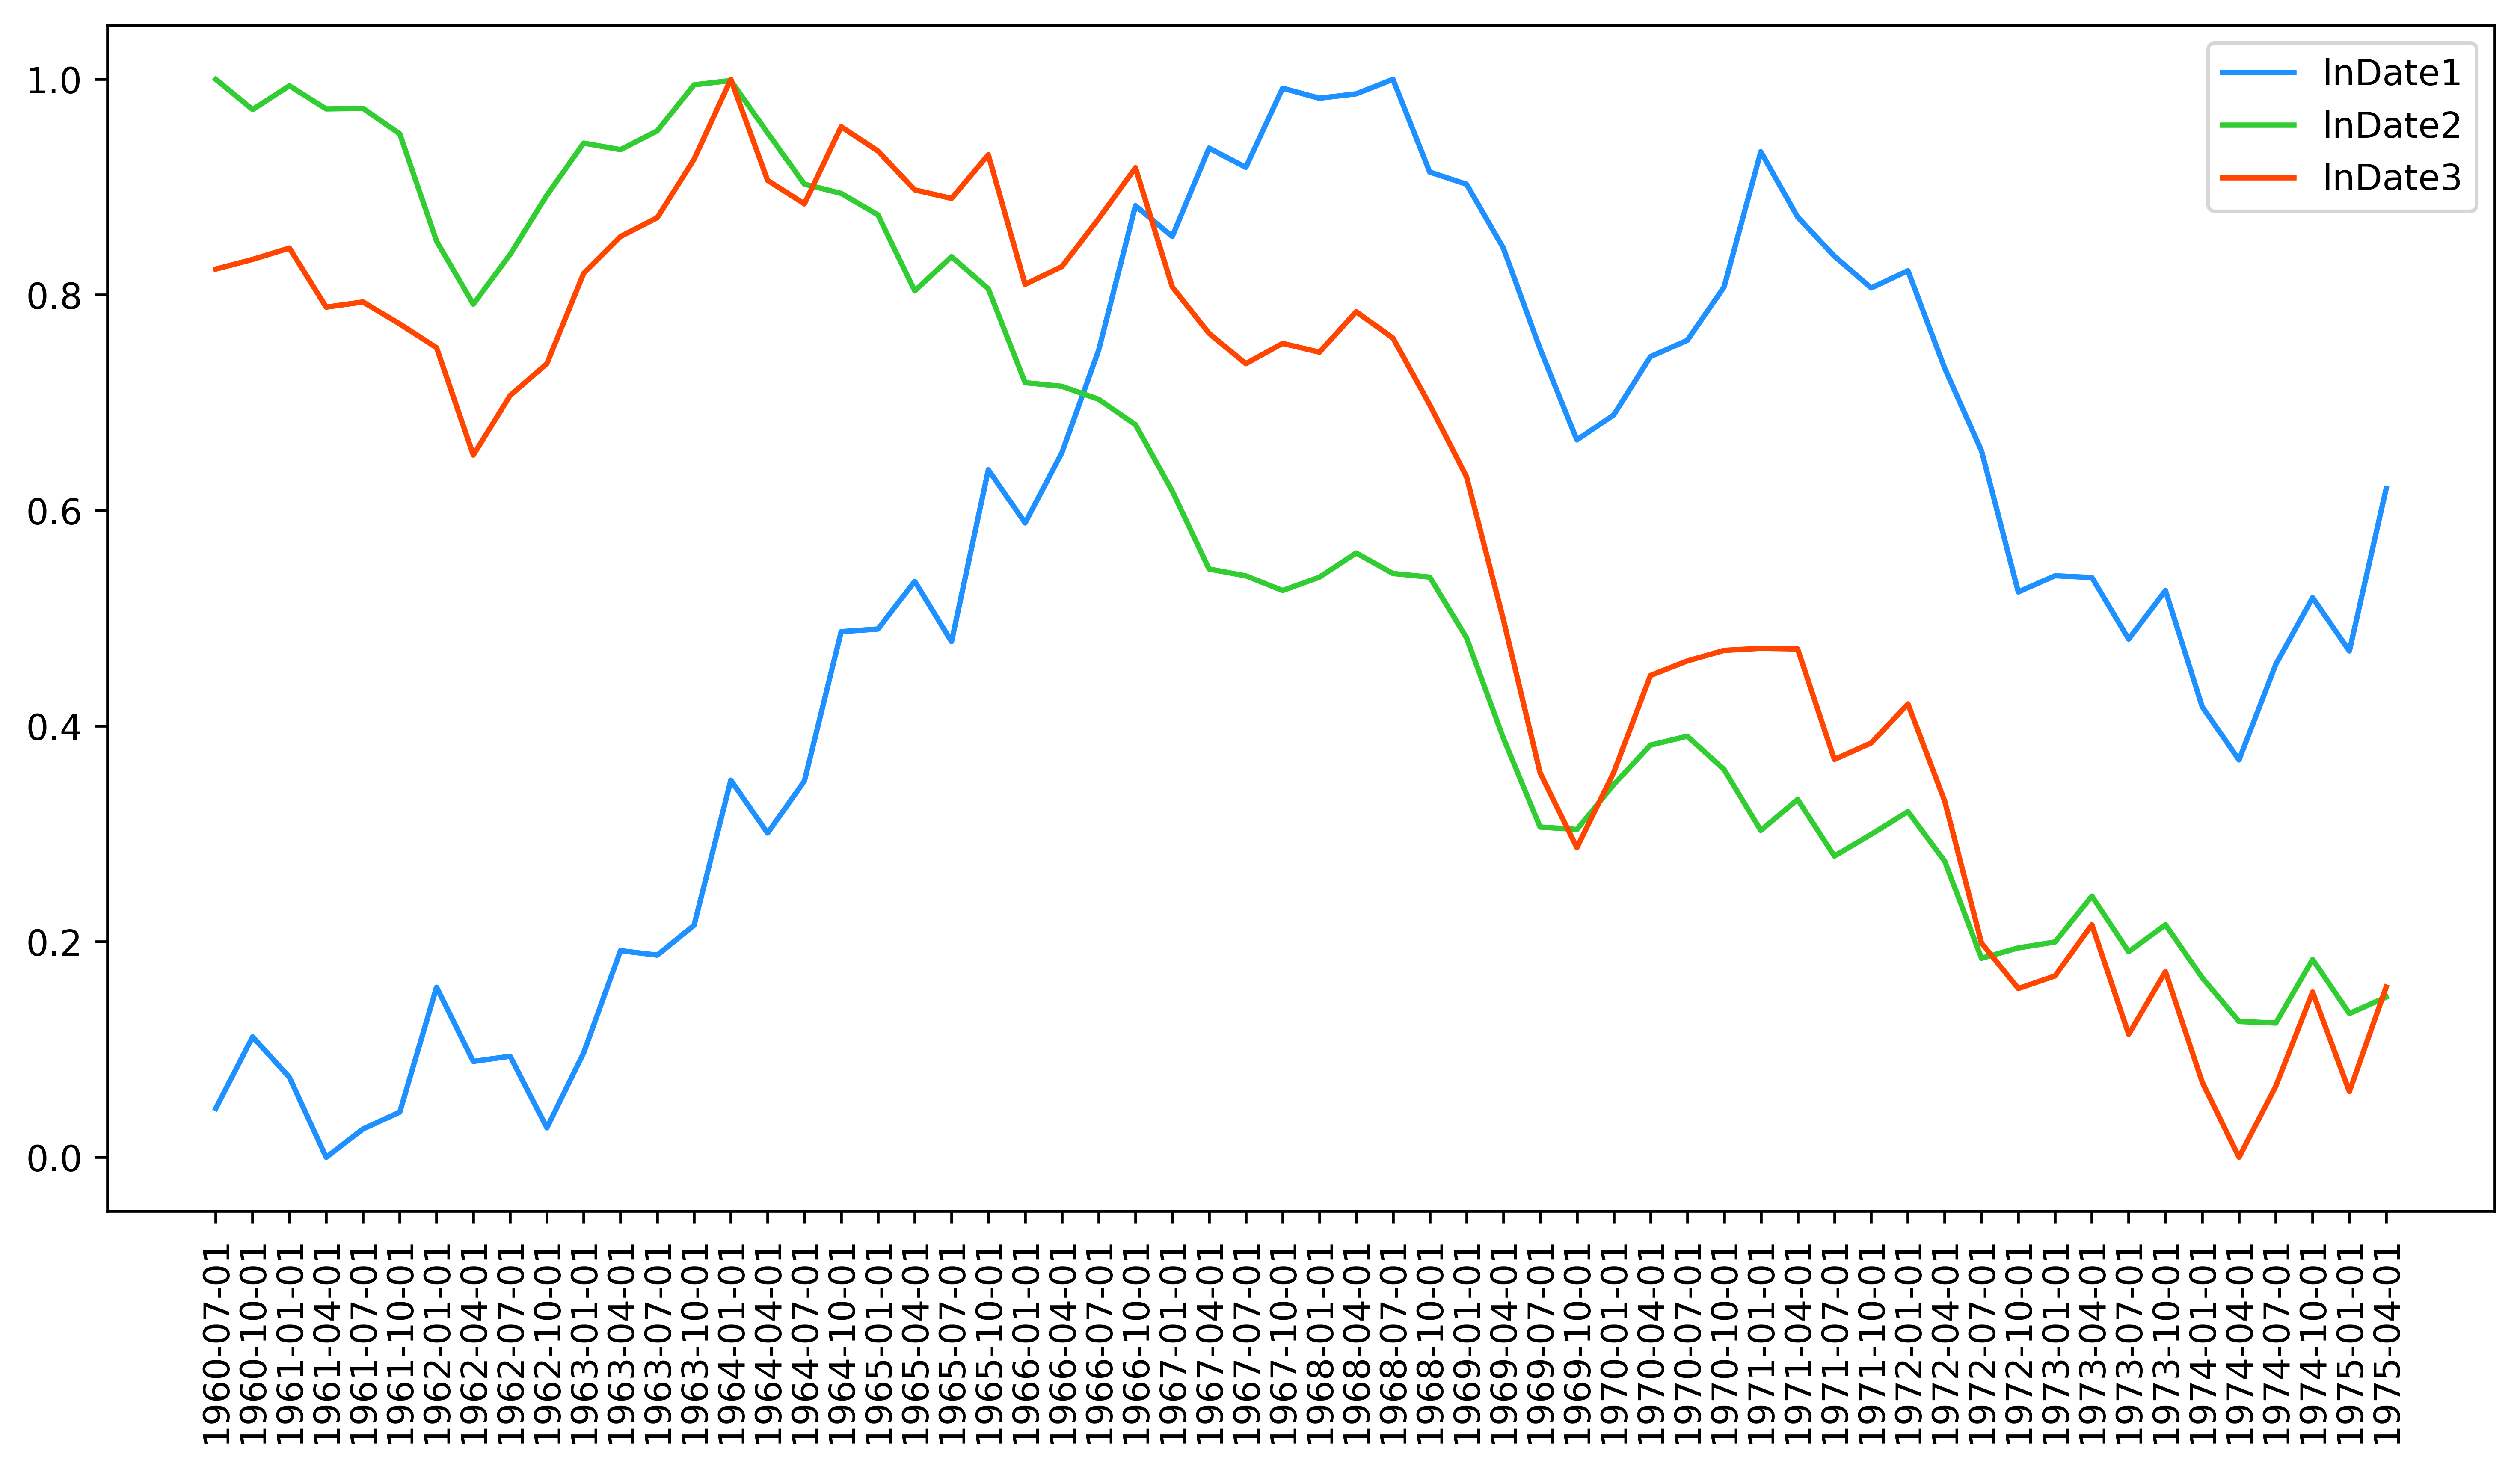

In [3]:
plt.figure(figsize=(12,6),dpi=600)
plt.xticks(rotation=90)
plt.plot(data_train['lnDate1'],'dodgerblue',label='lnDate1')
plt.plot(data_train['lnDate2'],'limegreen',label='lnDate2')
plt.plot(data_train['lnDate3'],'orangered',label='lnDate3')
plt.legend()
plt.show()

adf检验

In [4]:
from statsmodels.tsa.stattools import adfuller #adf检验
adf_result1 = adfuller(data_train['lnDate1'])
adf_result2 = adfuller(data_train['lnDate2'])
adf_result3 = adfuller(data_train['lnDate3'])
print(adf_result1[1],adf_result2[1],adf_result3[1])

0.19341638466350147 0.8806961283442936 0.9147461773812955


差分

In [5]:
#一阶差分
data_train_diff=data_train.diff(1)
data_train_diff=data_train_diff.dropna()
data_train_diff

,lnDate1,lnDate2,lnDate3
myTime,,,
1960-10-01,0.066342,-0.027986,0.008973
1961-01-01,-0.037548,0.021982,0.010542
1961-04-01,-0.074238,-0.021428,-0.054842
1961-07-01,0.026239,0.000535,0.004826
1961-10-01,0.015705,-0.023720,-0.020377
...,...,...,...
1974-04-01,-0.049278,-0.040556,-0.069696
1974-07-01,0.088643,-0.001442,0.065994
1974-10-01,0.061874,0.058986,0.087306


再次adf检验

In [6]:
adf_result1 = adfuller(data_train_diff['lnDate1'])
adf_result2 = adfuller(data_train_diff['lnDate2'])
adf_result3 = adfuller(data_train_diff['lnDate3'])
print(adf_result1[1],adf_result2[1],adf_result3[1])

0.13617139745626627 4.0613672589027383e-08 4.67935863203642e-09


画图展示差分后的股票价格

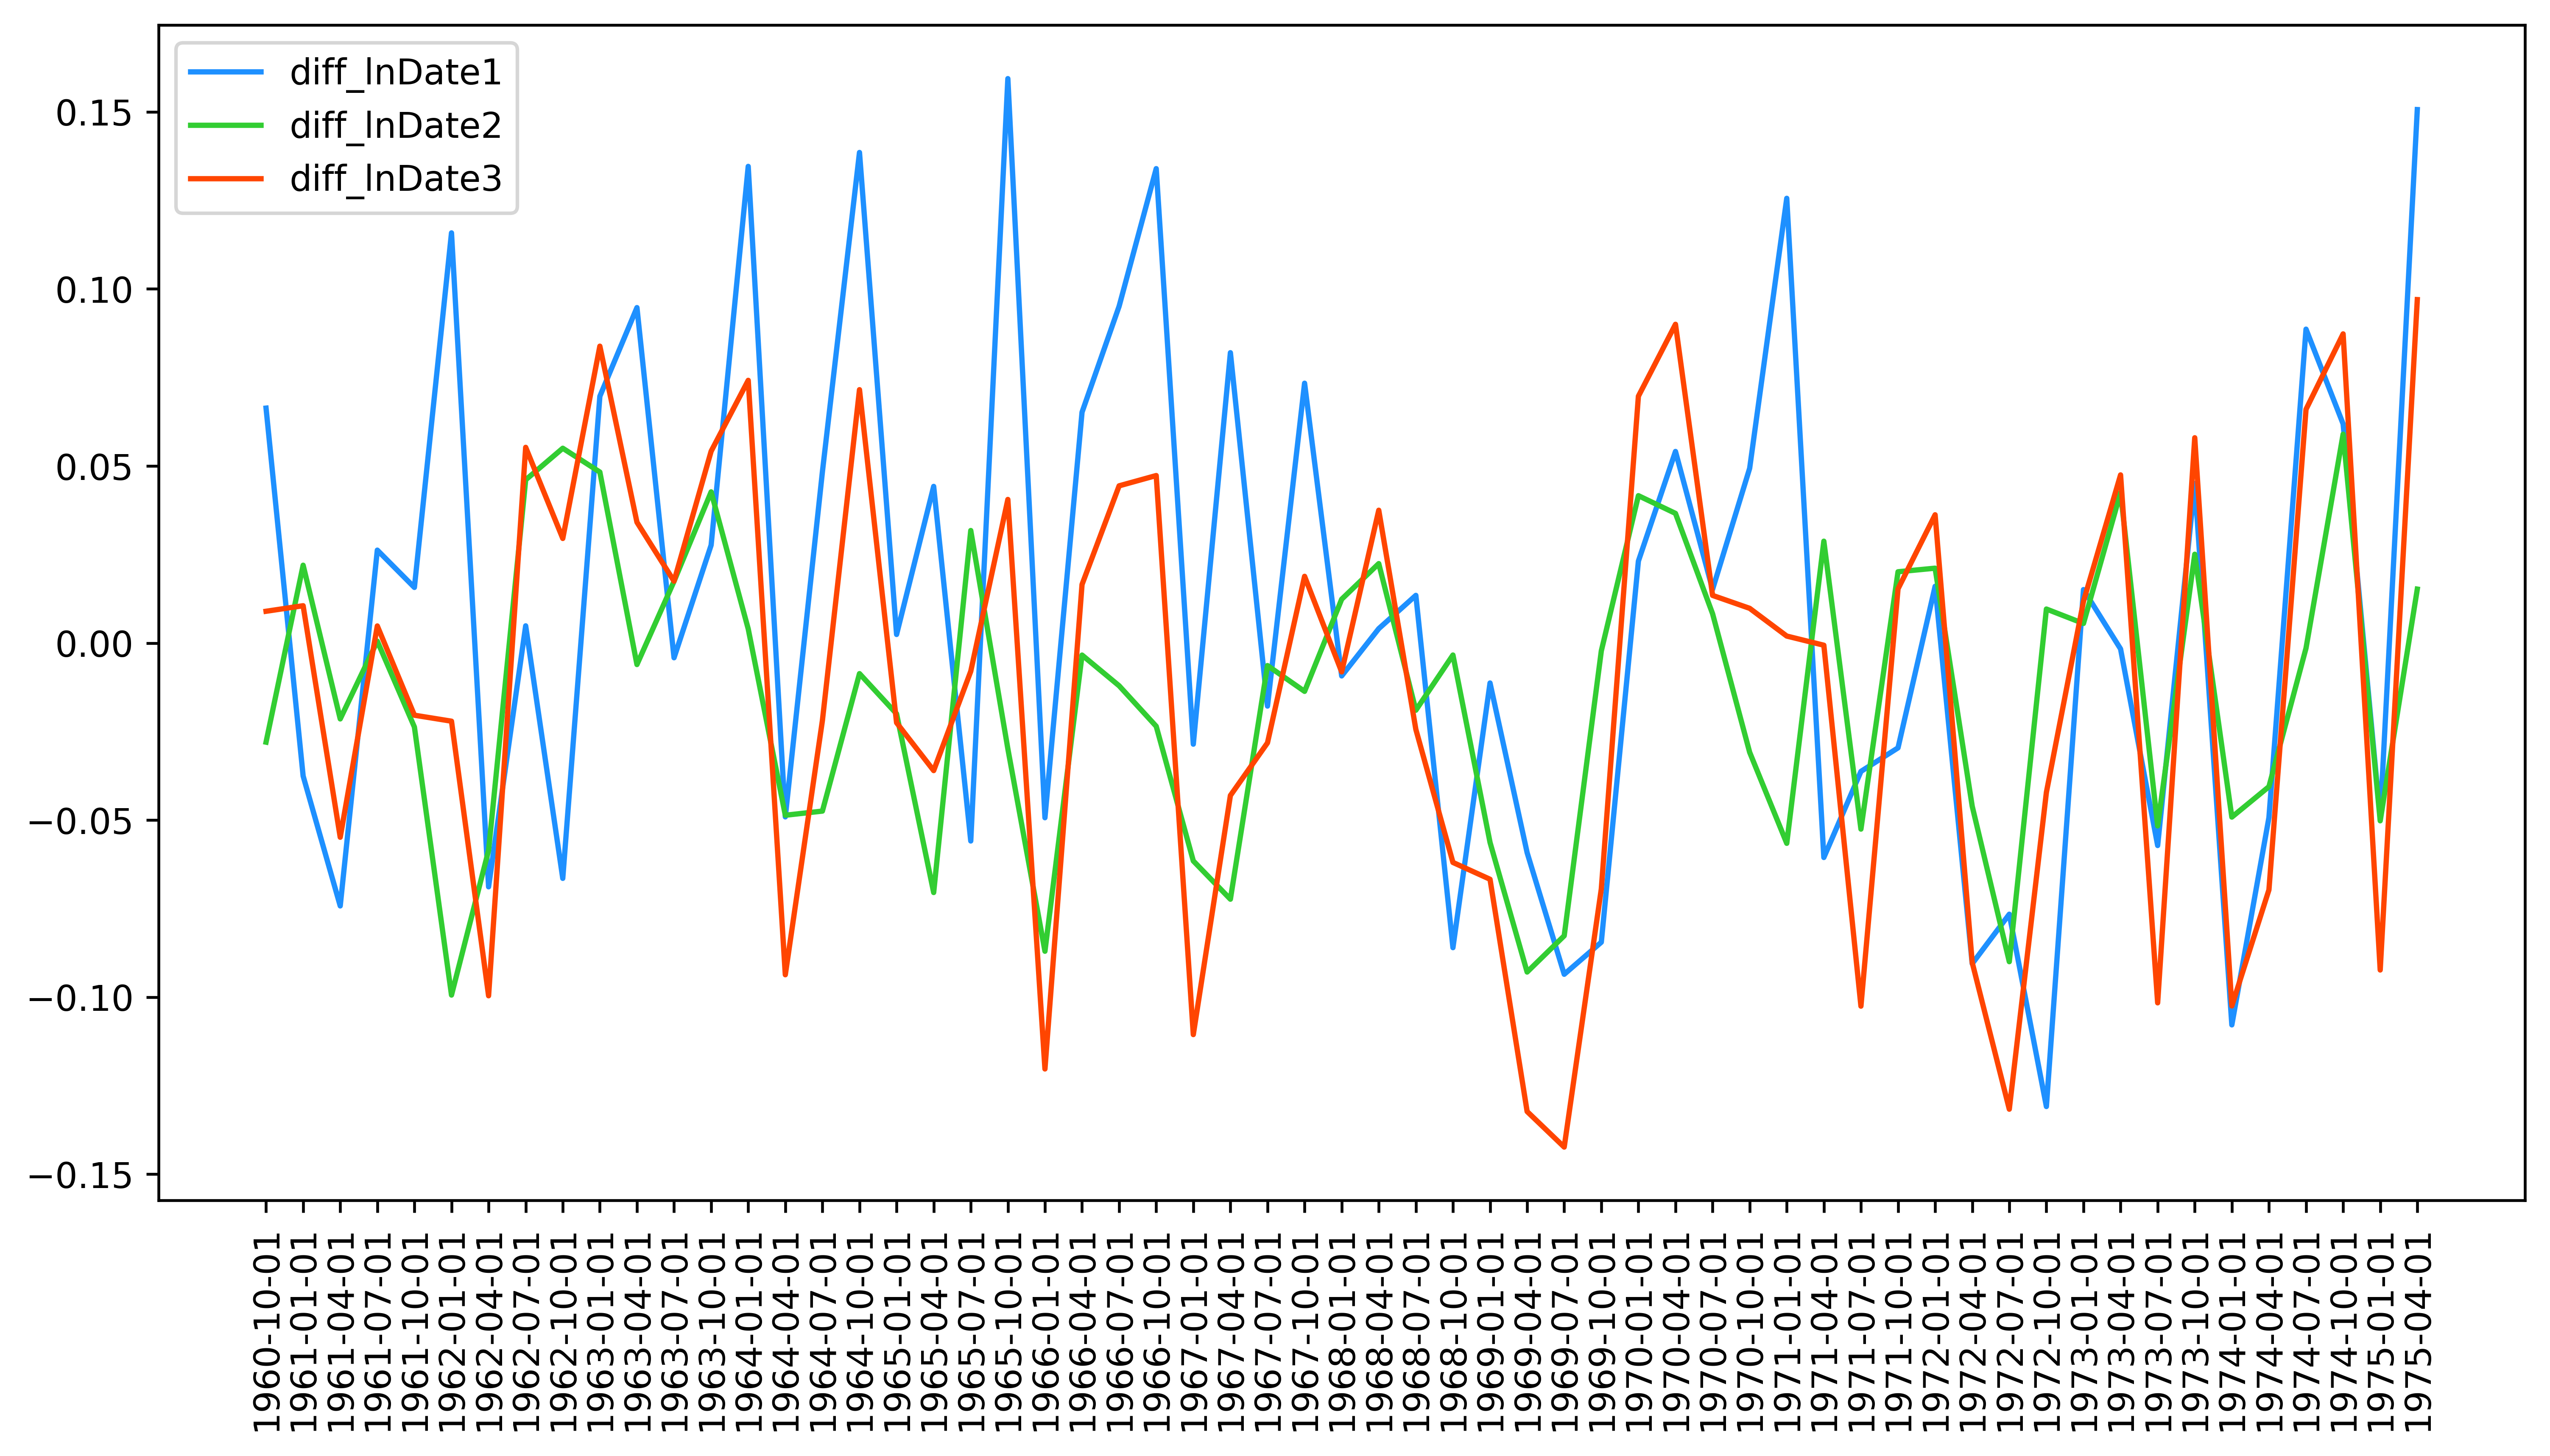

In [7]:
plt.figure(figsize=(12,6),dpi=600)
plt.xticks(rotation=90)
plt.plot(data_train_diff['lnDate1'],'dodgerblue',label='diff_lnDate1')
plt.plot(data_train_diff['lnDate2'],'limegreen',label='diff_lnDate2')
plt.plot(data_train_diff['lnDate3'],'orangered',label='diff_lnDate3')
plt.legend()
plt.show()

### 3.建模

建立模型，训练模型

In [8]:
model_1 = sm.tsa.VARMAX(data_train_diff, order=(4,5)) #建模
res_1 = model_1.fit(maxiter=1000) #训练模型，最大迭代次数1000
print(res_1.summary())

                                   Statespace Model Results                                  
Dep. Variable:     ['lnDate1', 'lnDate2', 'lnDate3']   No. Observations:                   59
Model:                                    VARMA(4,5)   Log Likelihood                 388.676
                                         + intercept   AIC                           -597.353
Date:                               Sun, 26 Mar 2023   BIC                           -410.375
Time:                                       12:55:57   HQIC                          -524.364
Sample:                                   10-01-1960                                         
                                        - 04-01-1975                                         
Covariance Type:                                 opg                                         
Ljung-Box (L1) (Q):       0.43, 0.40, 0.07   Jarque-Bera (JB):     1.11, 0.01, 0.81
Prob(Q):                  0.51, 0.53, 0.80   Prob(JB):             0.5

预测股票

In [9]:
pred_1 = res_1.forecast(steps=10) #预测后面10条
pred_1

,lnDate1,lnDate2,lnDate3
1975-07-01,0.050955,0.039605,0.060858
1975-10-01,0.056363,-0.084206,-0.064312
1976-01-01,-0.016099,-0.064923,-0.076901
1976-04-01,0.037201,0.013077,0.027752
1976-07-01,-0.006229,-0.027226,-0.036306
1976-10-01,0.014564,-0.020899,-0.018274
1977-01-01,0.007547,0.001066,0.000135
1977-04-01,0.024986,-0.025027,-0.013393
1977-07-01,0.002725,-0.024596,-0.026262
1977-10-01,0.011247,-0.016356,-0.013903


差分还原

In [10]:
pred_1_real=pd.DataFrame(np.zeros((11,3)),columns= ['lnDate1', 'lnDate2', 'lnDate3']) 
pred_1_real.index=pd.date_range('1975/04/1', periods=11, freq='3MS')
pred_1_real.iloc[0,:]=data_all.iloc[59,0:3]
pred_1_real

,lnDate1,lnDate2,lnDate3
1975-04-01,0.620375,0.148617,0.157956
1975-07-01,0.000000,0.000000,0.000000
1975-10-01,0.000000,0.000000,0.000000
1976-01-01,0.000000,0.000000,0.000000
1976-04-01,0.000000,0.000000,0.000000
...,...,...,...
1976-10-01,0.000000,0.000000,0.000000
1977-01-01,0.000000,0.000000,0.000000
1977-04-01,0.000000,0.000000,0.000000
1977-07-01,0.000000,0.000000,0.000000


In [11]:
#差分还原
for i in range(len(pred_1)):
    pred_1_real.iloc[i+1,0]= pred_1_real.iloc[i,0]+pred_1.iloc[i,0]
    pred_1_real.iloc[i+1,1]= pred_1_real.iloc[i,1]+pred_1.iloc[i,1]
    pred_1_real.iloc[i+1,2]= pred_1_real.iloc[i,2]+pred_1.iloc[i,2]
    
pred_1_real

,lnDate1,lnDate2,lnDate3
1975-04-01,0.620375,0.148617,0.157956
1975-07-01,0.671330,0.188222,0.218814
1975-10-01,0.727693,0.104016,0.154502
1976-01-01,0.711593,0.039093,0.077601
1976-04-01,0.748795,0.052169,0.105353
...,...,...,...
1976-10-01,0.757130,0.004045,0.050773
1977-01-01,0.764677,0.005111,0.050908
1977-04-01,0.789663,-0.019917,0.037515
1977-07-01,0.792388,-0.044513,0.011253


画图展示预测结果

In [12]:
data_all.index=pd.date_range('1960/7/1', periods=70, freq='3MS')

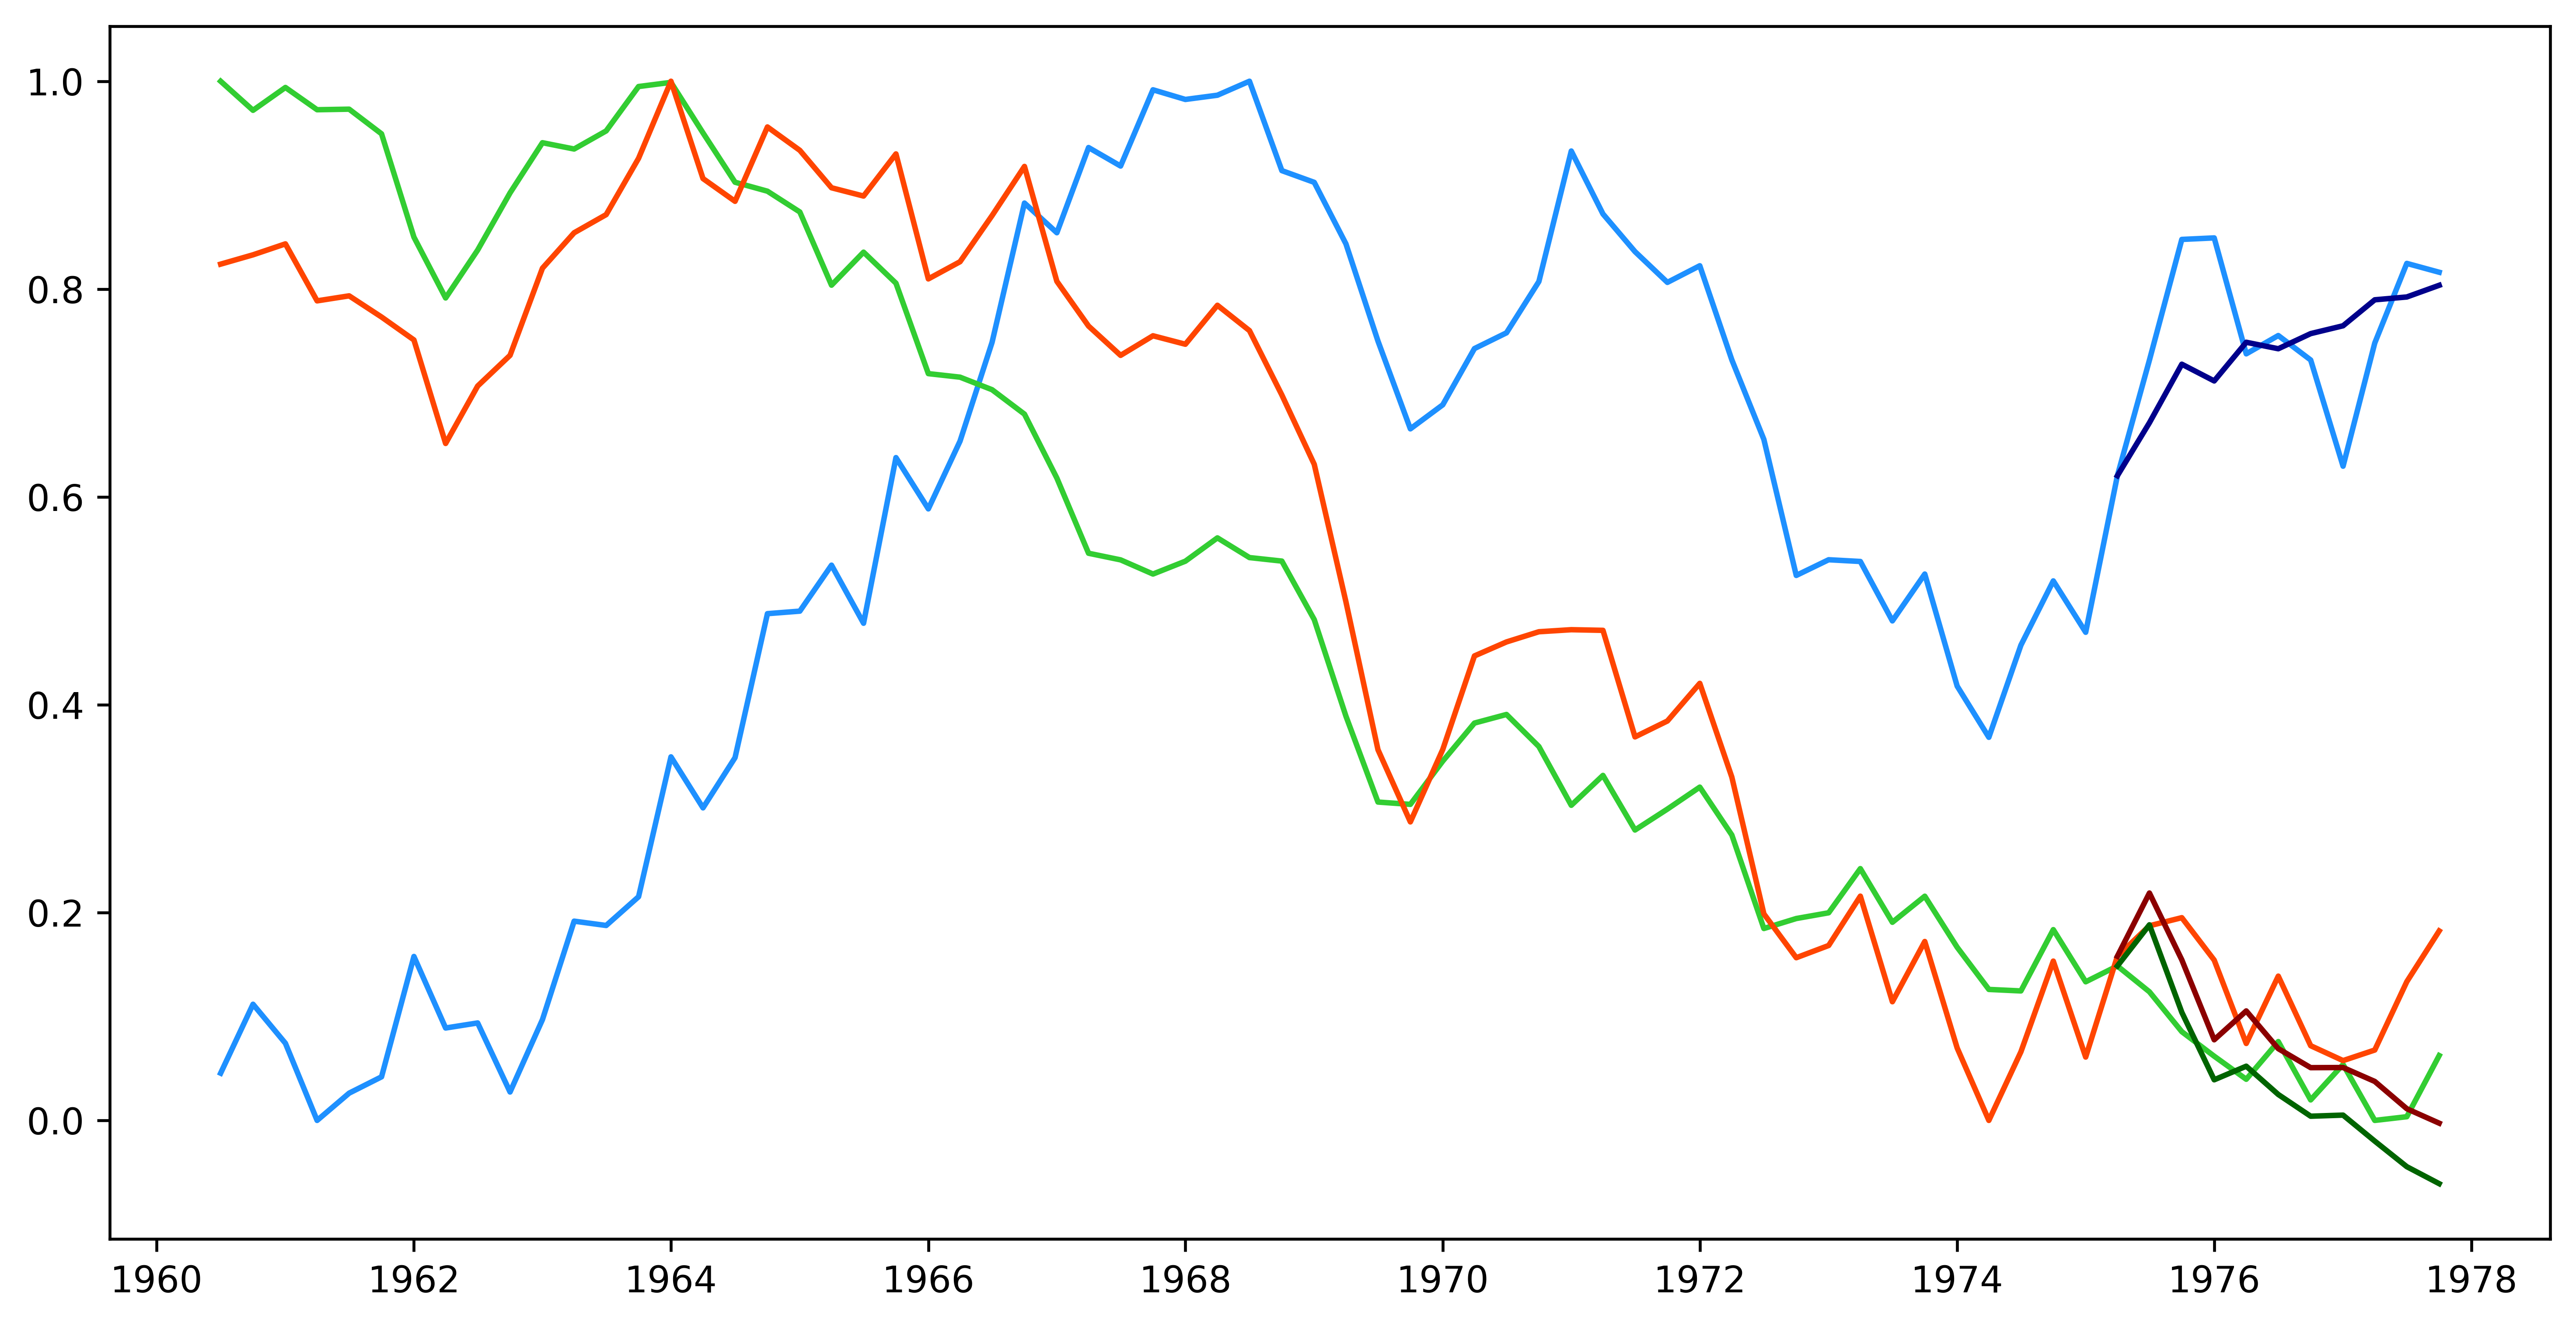

In [13]:
plt.figure(figsize=(12,6),dpi=600)
plt.plot(data_all['lnDate1'],'dodgerblue',data_all['lnDate2'],'limegreen',data_all['lnDate3'],'orangered')
plt.plot(pred_1_real['lnDate1'],'darkblue',pred_1_real['lnDate2'],'darkgreen',pred_1_real['lnDate3'],'darkred')
plt.show()

In [14]:
data_actual=data_all.tail(11)
data_actual

,lnDate1,lnDate2,lnDate3
1975-04-01,0.620375,0.148617,0.157956
1975-07-01,0.731584,0.123763,0.187303
1975-10-01,0.847765,0.085390,0.195090
1976-01-01,0.849229,0.061798,0.154247
1976-04-01,0.737663,0.039590,0.074057
...,...,...,...
1976-10-01,0.731735,0.019728,0.071891
1977-01-01,0.629549,0.053850,0.057567
1977-04-01,0.748059,0.000000,0.067738
1977-07-01,0.824693,0.003567,0.133505


检验模型，计算均方误差

In [15]:
error_1=pow(data_actual['lnDate1']-pred_1_real['lnDate1'],2)
MSE1=error_1.sum()/len(pred_1_real['lnDate1'])
error_2=pow(data_actual['lnDate2']-pred_1_real['lnDate2'],2)
MSE2=error_2.sum()/len(pred_1_real['lnDate2'])
error_3=pow(data_actual['lnDate3']-pred_1_real['lnDate3'],2)
MSE3=error_3.sum()/len(pred_1_real['lnDate3'])
print(MSE1,MSE2,MSE3)

0.00537397803235929 0.0025727491550344528 0.005903329778996322


## 5.参数优化

更换参数，建模

In [16]:
model_2 = sm.tsa.VARMAX(data_train_diff, order=(4,4)) #建模
res_2 = model_2.fit(maxiter=1000) #训练模型，最大迭代次数
print(res_2.summary())

                                   Statespace Model Results                                  
Dep. Variable:     ['lnDate1', 'lnDate2', 'lnDate3']   No. Observations:                   59
Model:                                    VARMA(4,4)   Log Likelihood                 381.573
                                         + intercept   AIC                           -601.146
Date:                               Sun, 26 Mar 2023   BIC                           -432.865
Time:                                       12:56:07   HQIC                          -535.456
Sample:                                   10-01-1960                                         
                                        - 04-01-1975                                         
Covariance Type:                                 opg                                         
Ljung-Box (L1) (Q):       0.00, 0.02, 0.01   Jarque-Bera (JB):     1.89, 0.28, 0.01
Prob(Q):                  0.95, 0.89, 0.91   Prob(JB):             0.3

In [17]:
pred_2 = res_2.forecast(steps=10) #预测后10条
pred_2

,lnDate1,lnDate2,lnDate3
1975-07-01,0.030428,0.036154,0.045351
1975-10-01,0.082733,-0.061637,-0.022765
1976-01-01,-0.018183,-0.042549,-0.062980
1976-04-01,0.050344,-0.003214,0.019478
1976-07-01,0.010703,-0.026306,-0.025958
1976-10-01,0.011163,-0.016686,-0.017344
1977-01-01,0.007168,-0.014274,-0.014788
1977-04-01,0.015539,-0.021559,-0.016298
1977-07-01,0.001110,-0.017767,-0.020346
1977-10-01,0.007162,-0.019385,-0.018471


In [18]:
pred_2_real=pd.DataFrame(np.zeros((11,3)),columns= ['lnDate1', 'lnDate2', 'lnDate3']) 
pred_2_real.index=pd.date_range('1975/04/1', periods=11, freq='3MS')
pred_2_real.iloc[0,:]=data_all.iloc[59,0:3]
for i in range(len(pred_2)):
    pred_2_real.iloc[i+1,0]= pred_2_real.iloc[i,0]+pred_2.iloc[i,0]
    pred_2_real.iloc[i+1,1]= pred_2_real.iloc[i,1]+pred_2.iloc[i,1]
    pred_2_real.iloc[i+1,2]= pred_2_real.iloc[i,2]+pred_2.iloc[i,2]
    
pred_2_real

,lnDate1,lnDate2,lnDate3
1975-04-01,0.620375,0.148617,0.157956
1975-07-01,0.650804,0.184771,0.203307
1975-10-01,0.733537,0.123134,0.180542
1976-01-01,0.715353,0.080585,0.117561
1976-04-01,0.765698,0.077371,0.137039
...,...,...,...
1976-10-01,0.787563,0.034379,0.093737
1977-01-01,0.794731,0.020106,0.078949
1977-04-01,0.810271,-0.001454,0.062651
1977-07-01,0.811380,-0.019221,0.042305


画图展现预测结果

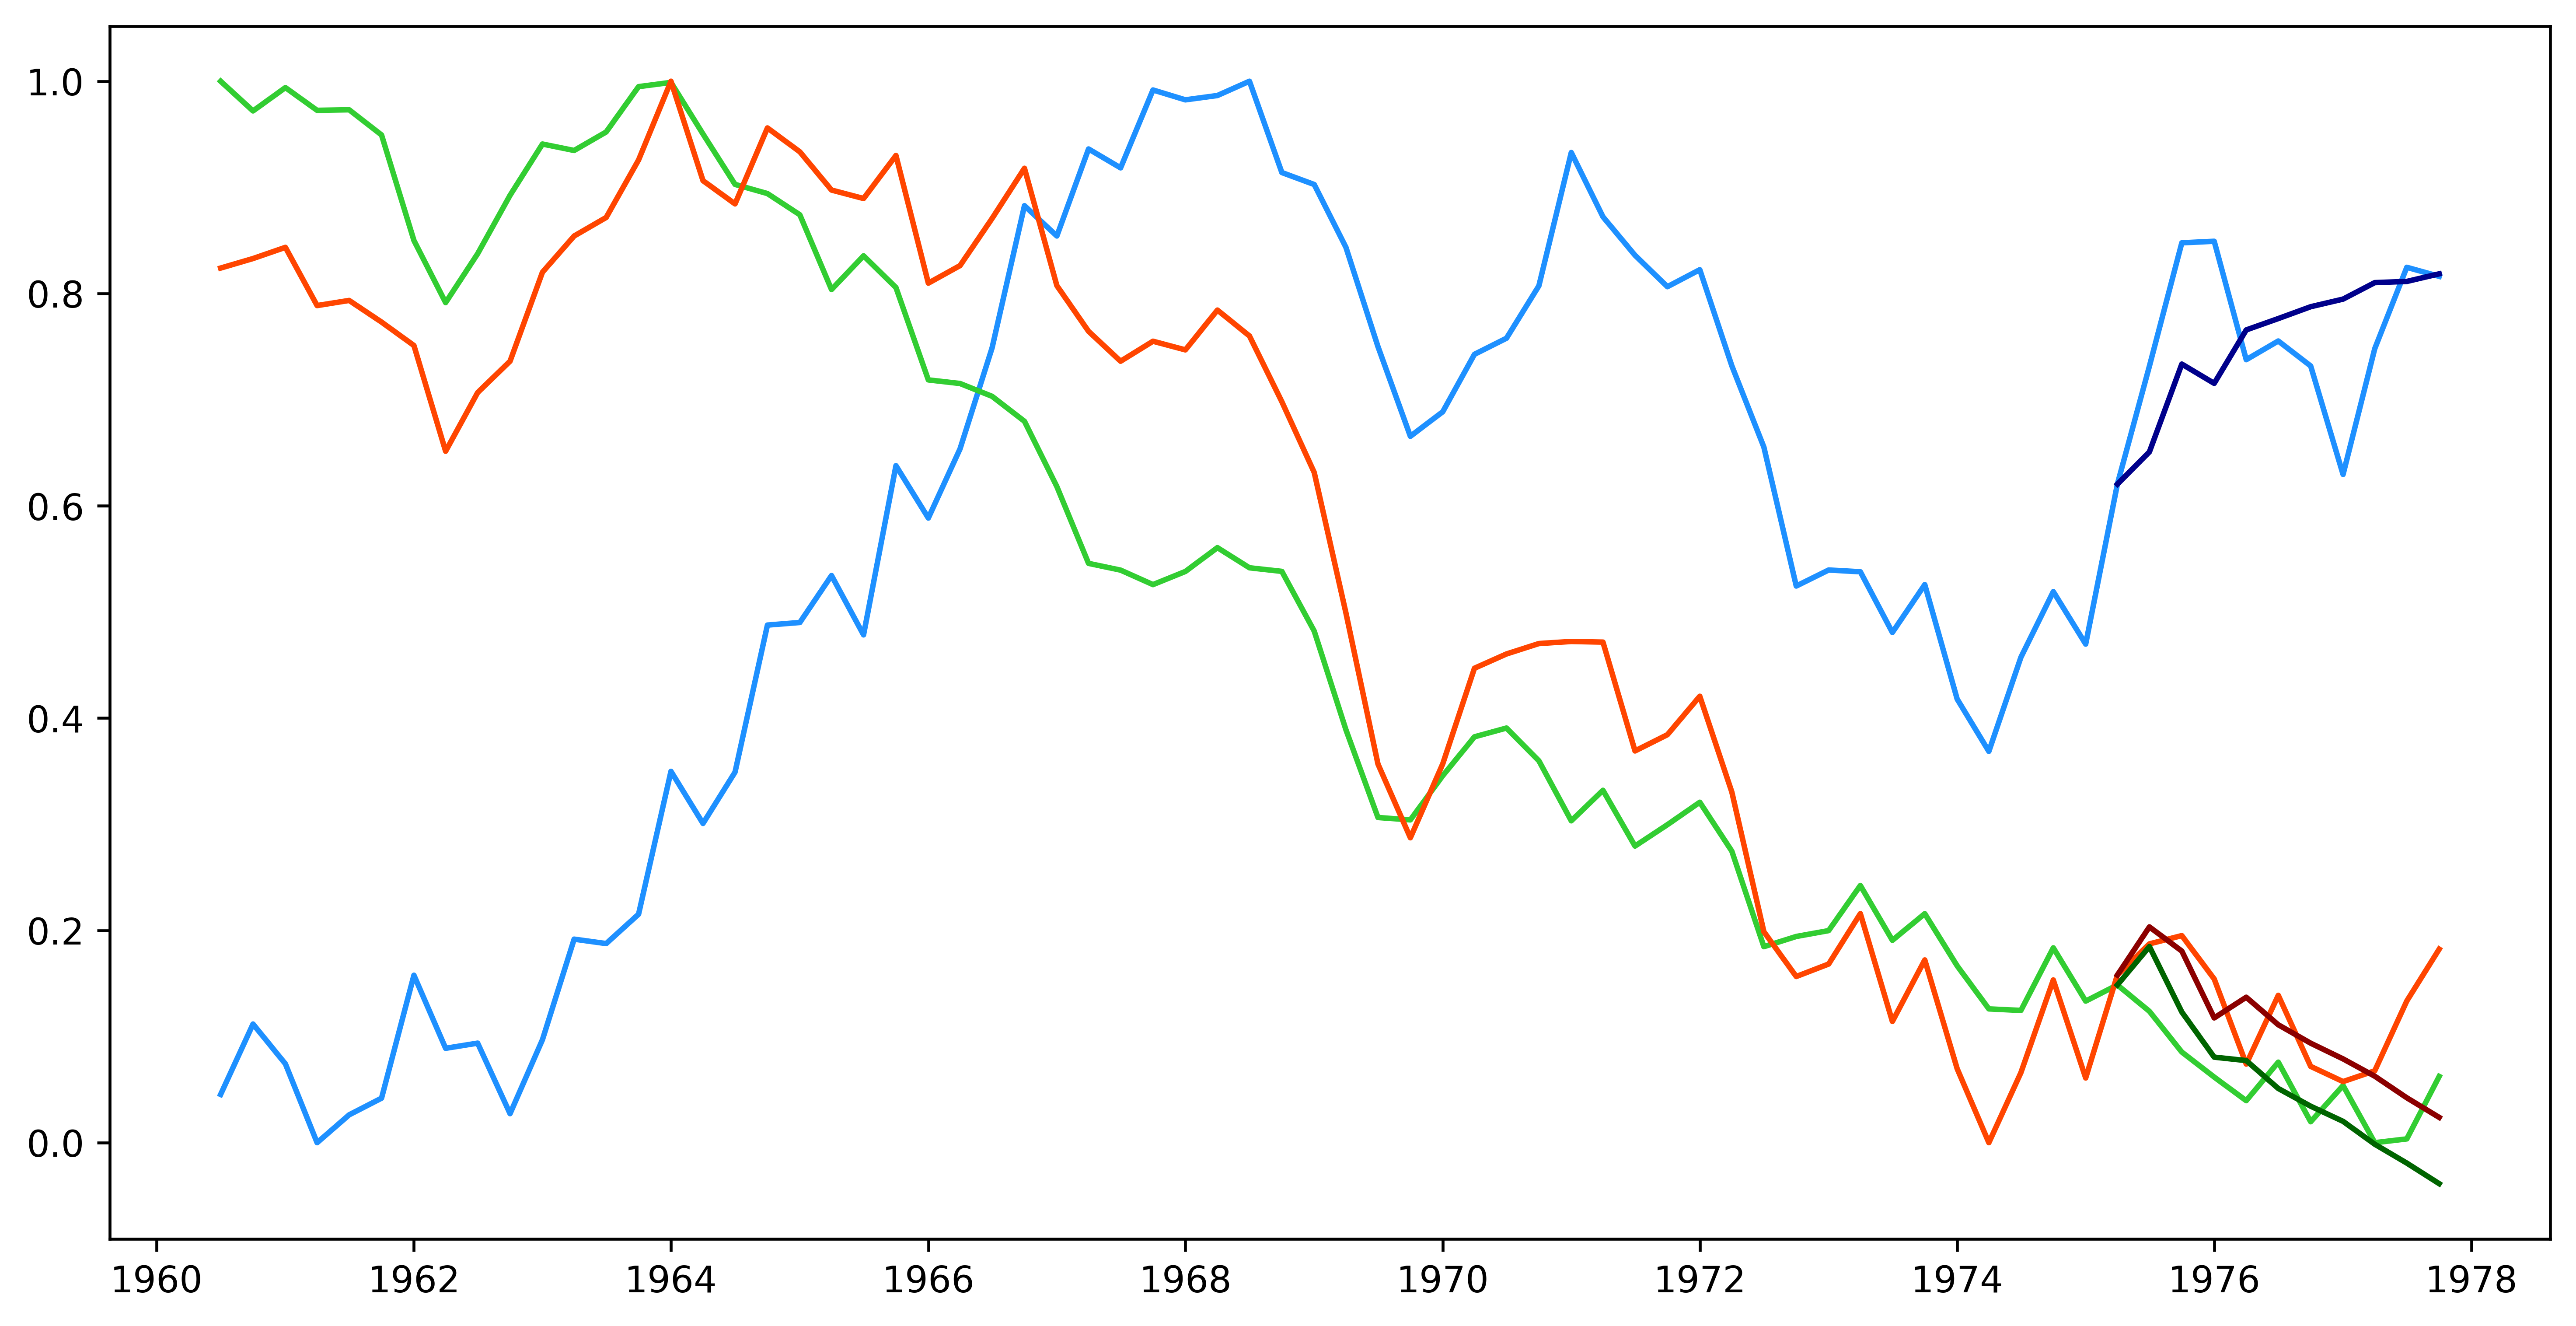

In [19]:
data_all.index=pd.date_range('1960/7/1', periods=70, freq='3MS')
plt.figure(figsize=(12,6),dpi=600)
plt.plot(data_all['lnDate1'],'dodgerblue',data_all['lnDate2'],'limegreen',data_all['lnDate3'],'orangered')
plt.plot(pred_2_real['lnDate1'],'darkblue',pred_2_real['lnDate2'],'darkgreen',pred_2_real['lnDate3'],'darkred')
plt.show()

模型检验，计算均方误差

In [20]:
error_new_1=pow(data_actual['lnDate1']-pred_2_real['lnDate1'],2)
MSE1_new=error_new_1.sum()/len(pred_2_real['lnDate1'])
error_new_2=pow(data_actual['lnDate2']-pred_2_real['lnDate2'],2)
MSE2_new=error_new_2.sum()/len(pred_2_real['lnDate2'])
error_new_3=pow(data_actual['lnDate3']-pred_2_real['lnDate3'],2)
MSE3_new=error_new_3.sum()/len(pred_2_real['lnDate3'])
print(MSE1_new,MSE2_new,MSE3_new)

0.006653007496734334 0.00178399140241239 0.003722976365013256


根据比较均方误差可以看出，参数为(4,4)时模型的预测结果更好